In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

acce_file_path = './PDR_2/Accelerometer.csv'
gyro_file_path = './PDR_2/Gyroscope.csv'

acce_data = pd.read_csv(acce_file_path,names=['timestamp','x','y','z'], header=0)
gyro_data = pd.read_csv(gyro_file_path,names=['timestamp','x','y','z'], header=0)

# 2sから9sまでのデータに絞る
acce_data = acce_data[(acce_data['timestamp'] >= 2.0) & (acce_data['timestamp'] <= 9.0)]
gyro_data = gyro_data[(gyro_data['timestamp'] >= 2.0) & (gyro_data['timestamp'] <= 9.0)]

In [22]:
acce_data

acce_data['norm'] = (acce_data['y']**2 + acce_data['z']**2)**0.5

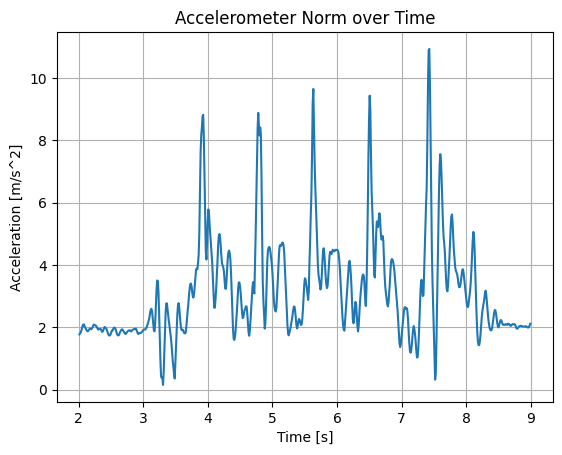

In [23]:
plt.plot(acce_data['timestamp'], acce_data['norm'])
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s^2]')
plt.title('Accelerometer Norm over Time')
plt.grid()
plt.show()

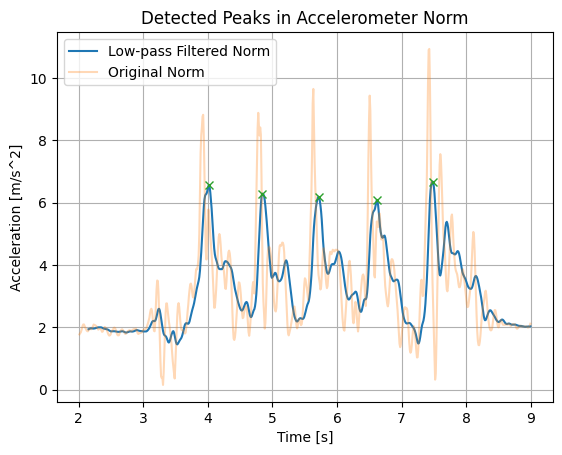

In [24]:
acce_data['low_norm'] = acce_data['norm'].rolling(window=15).mean()
peak,_ = signal.find_peaks(acce_data['low_norm'], height=5, distance=25)

#peakを点にしてプロット
plt.plot(acce_data['timestamp'], acce_data['low_norm'], label='Low-pass Filtered Norm')
plt.plot(acce_data['timestamp'], acce_data['norm'], alpha=0.3, label='Original Norm')
plt.plot(acce_data['timestamp'].iloc[peak], acce_data['low_norm'].iloc[peak], "x")
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s^2]')
plt.title('Detected Peaks in Accelerometer Norm')
plt.legend()
plt.grid()

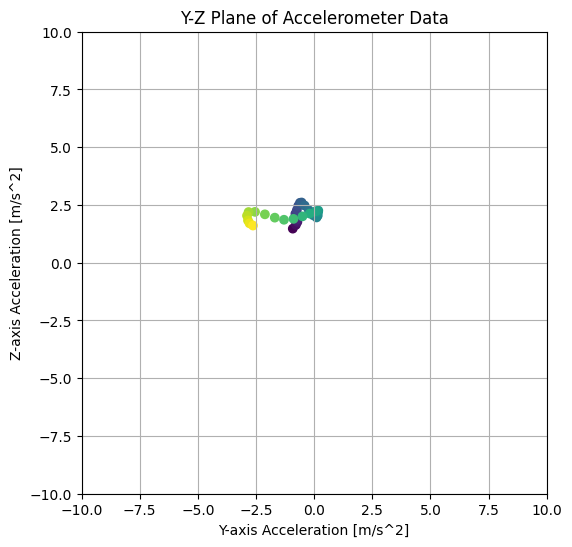

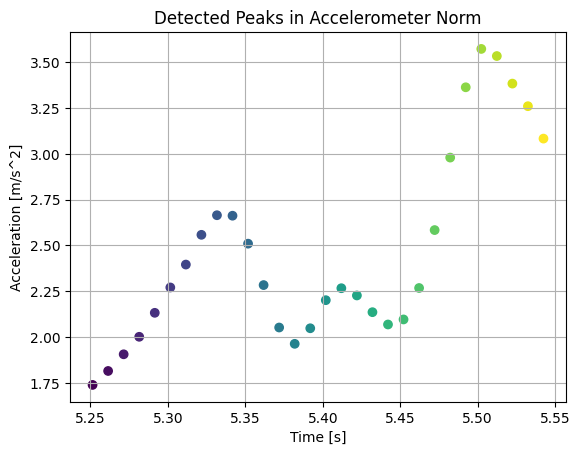

In [25]:
step_df = acce_data[(acce_data['timestamp']>= 5.25) & (acce_data['timestamp']<=5.55)]
plt.figure(figsize=(6,6))
plt.scatter(step_df['y'],step_df['z'], c = step_df['timestamp'], cmap='viridis')
plt.xlabel('Y-axis Acceleration [m/s^2]')
plt.ylabel('Z-axis Acceleration [m/s^2]')
plt.title('Y-Z Plane of Accelerometer Data')
plt.ylim(-10,10)
plt.xlim(-10,10)
plt.grid()
plt.show()

plt.scatter(step_df['timestamp'], step_df['norm'], c = step_df['timestamp'], cmap='viridis')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s^2]')
plt.title('Detected Peaks in Accelerometer Norm')
plt.grid()